<a href="https://colab.research.google.com/github/Tanisha110/Creditcardfraud/blob/main/code/ProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #panel data that helps manipulate data
import numpy as np
from sklearn.preprocessing import StandardScaler#to scale and normalise data

In [2]:
#loading the original dataset
original_data=pd.read_csv('/content/spotify_tracks (1).csv')

In [3]:
#getting data info to detect any null or duplicate values
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22629 entries, 0 to 22628
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          22629 non-null  object 
 1   track_name        22628 non-null  object 
 2   artist_name       22628 non-null  object 
 3   year              22628 non-null  float64
 4   popularity        22628 non-null  float64
 5   artwork_url       22628 non-null  object 
 6   album_name        22628 non-null  object 
 7   acousticness      22628 non-null  float64
 8   danceability      22628 non-null  float64
 9   duration_ms       22628 non-null  float64
 10  energy            22628 non-null  float64
 11  instrumentalness  22628 non-null  float64
 12  key               22628 non-null  float64
 13  liveness          22628 non-null  float64
 14  loudness          22628 non-null  float64
 15  mode              22628 non-null  float64
 16  speechiness       22628 non-null  float6

In [4]:
#Removing Telugu and Malayalam songs since very low in number
original_data = original_data[original_data['language'] != 'Telugu'].reset_index(drop=True)
original_data = original_data[original_data['language'] != 'Malayalam'].reset_index(drop=True)

In [5]:
#dropping any duplicate values
original_data.drop_duplicates()

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
0,2r0ROhr7pRN4MXDMT1fEmd,"Leo Das Entry (From ""Leo"")",Anirudh Ravichander,2024.0,59.0,https://i.scdn.co/image/ab67616d0000b273ce9c65...,"Leo Das Entry (From ""Leo"")",0.02410,0.753,97297.0,...,8.0,0.1000,-5.994,0.0,0.1030,110.997,4.0,0.459,https://open.spotify.com/track/2r0ROhr7pRN4MXD...,Tamil
1,4I38e6Dg52a2o2a8i5Q5PW,AAO KILLELLE,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",2024.0,47.0,https://i.scdn.co/image/ab67616d0000b273be1b03...,AAO KILLELLE,0.08510,0.780,207369.0,...,10.0,0.0951,-5.674,0.0,0.0952,164.995,3.0,0.821,https://open.spotify.com/track/4I38e6Dg52a2o2a...,Tamil
2,59NoiRhnom3lTeRFaBzOev,Mayakiriye Sirikiriye - Orchestral EDM,"Anirudh Ravichander, Anivee, Alvin Bruno",2024.0,35.0,https://i.scdn.co/image/ab67616d0000b27334a1dd...,Mayakiriye Sirikiriye (Orchestral EDM),0.03110,0.457,82551.0,...,2.0,0.0831,-8.937,0.0,0.1530,169.996,4.0,0.598,https://open.spotify.com/track/59NoiRhnom3lTeR...,Tamil
3,5uUqRQd385pvLxC8JX3tXn,Scene Ah Scene Ah - Experimental EDM Mix,"Anirudh Ravichander, Bharath Sankar, Kabilan, ...",2024.0,24.0,https://i.scdn.co/image/ab67616d0000b27332e623...,Scene Ah Scene Ah (Experimental EDM Mix),0.22700,0.718,115831.0,...,7.0,0.1240,-11.104,1.0,0.4450,169.996,4.0,0.362,https://open.spotify.com/track/5uUqRQd385pvLxC...,Tamil
4,1KaBRg2xgNeCljmyxBH1mo,Gundellonaa X I Am A Disco Dancer - Mashup,"Anirudh Ravichander, Benny Dayal, Leon James, ...",2024.0,22.0,https://i.scdn.co/image/ab67616d0000b2735a59b6...,Gundellonaa X I Am a Disco Dancer (Mashup),0.01530,0.689,129621.0,...,7.0,0.3450,-9.637,1.0,0.1580,128.961,4.0,0.593,https://open.spotify.com/track/1KaBRg2xgNeCljm...,Tamil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22128,0nrRP2bk19rLc0orkWPQk2,Wake Me Up,Avicii,2013.0,87.0,https://i.scdn.co/image/ab67616d0000b273e14f11...,True,0.00380,0.532,247427.0,...,2.0,0.1610,-5.697,1.0,0.0523,124.080,4.0,0.643,https://open.spotify.com/track/0nrRP2bk19rLc0o...,English
22129,4lhqb6JvbHId48OUJGwymk,Hey Brother,Avicii,2013.0,79.0,https://i.scdn.co/image/ab67616d0000b273e14f11...,True,0.03090,0.545,255093.0,...,7.0,0.0828,-4.867,0.0,0.0436,125.014,4.0,0.458,https://open.spotify.com/track/4lhqb6JvbHId48O...,English
22130,4eDYMhIin1pSLIG96f1aD0,Addicted To You,Avicii,2013.0,76.0,https://i.scdn.co/image/ab67616d0000b273e14f11...,True,0.05050,0.569,148387.0,...,1.0,0.0860,-4.057,0.0,0.0457,128.031,4.0,0.303,https://open.spotify.com/track/4eDYMhIin1pSLIG...,English
22131,52RK8UVEDgUAgpecOpTQM3,You Make Me,Avicii,2013.0,67.0,https://i.scdn.co/image/ab67616d0000b273e14f11...,True,0.00247,0.586,233347.0,...,6.0,0.1520,-4.799,1.0,0.0390,124.990,4.0,0.496,https://open.spotify.com/track/52RK8UVEDgUAgpe...,English


In [6]:
unknown_songs = original_data[original_data['language'].str.lower() == 'unknown']

unknown_song_names = unknown_songs['track_name']
print(unknown_song_names)


1169                           Ori Vaari - Lofi Flip
1170          Neeye Oli - From "Sarpatta Parambarai"
1171                                  Wrong Pannadha
1172          Maamadura - From "Jigarthanda DoubleX"
1173                                    Unakku Thaan
                            ...                     
19729                           Ladies And Gentlemen
19730                                  Vasudevasutam
19731                           Namdella Bari Plussu
19732                                  Ganesh Kavach
19733    Dyuhu Shaantirantarikshyam (Shaanti Mantra)
Name: track_name, Length: 8999, dtype: object


In [7]:
search_term = "soch"
result = original_data[original_data['track_name'].str.contains(search_term, case=False, na=False)]
print(result[['track_name', 'artist_name', 'language']])


                                track_name  \
7301                       Soch Liya Remix   
7706             Maine Socha Ke Chura Loon   
7710         Soch Na Sake (From "Airlift")   
7781         Soch Na Sake (From "Airlift")   
7889         Soch Na Sake (From "Airlift")   
7920          Soch Na Sake (From "Airlift)   
8006                          Soch Na Sake   
8643                    Kabhi Socha Na Tha   
13931                    Tujhe Sochta Hoon   
14171                    Tujhe Sochta Hoon   
14665  Tujhe Sochta Hoon (From "Jannat 2")   
14682  Tujhe Sochta Hoon (From "Jannat 2")   
14785                    Tujhe Sochta Hoon   
18367                         Aage Ki Soch   

                                         artist_name language  
7301             Arijit Singh, Mithoon, Dj Amit Shah    Hindi  
7706                    Arijit Singh, Shreya Ghoshal    Hindi  
7710                                    Arijit Singh    Hindi  
7781                                    Arijit Singh 

In [8]:
for col in original_data.columns: #drop missing terms
  original_data.dropna(inplace=True)

In [9]:
original_data.isnull().sum() #checking again

,0
track_id,0
track_name,0
artist_name,0
year,0
popularity,0
artwork_url,0
album_name,0
acousticness,0
danceability,0
duration_ms,0


In [10]:
original_data.shape

(22132, 22)

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
# Selecting relevant columns for our predictive model
selected_columns = [
    'year', 'popularity', 'acousticness', 'danceability',
    'duration_ms', 'energy', 'instrumentalness', 'key',
    'liveness', 'loudness', 'mode', 'speechiness',
    'tempo', 'time_signature', 'valence'
]


dataframe_features = original_data[selected_columns]

#Identifying columns for different preprocessing methods
numerical_cols = ['year', 'popularity', 'duration_ms', 'loudness', 'tempo'] #we need to encode popularity
categorical_cols = ['key', 'time_signature'] #these need to be categorical
passthrough_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                    'liveness', 'mode', 'speechiness', 'valence']

# Step 3: Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),#numerical categories being encoded
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols) #already scaled beteen 0 and 1 by dataset
    ],
    remainder='passthrough'  # keep acousticness, etc. without changes
)


In [13]:
dataframe_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22132 entries, 0 to 22131
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              22132 non-null  float64
 1   popularity        22132 non-null  float64
 2   acousticness      22132 non-null  float64
 3   danceability      22132 non-null  float64
 4   duration_ms       22132 non-null  float64
 5   energy            22132 non-null  float64
 6   instrumentalness  22132 non-null  float64
 7   key               22132 non-null  float64
 8   liveness          22132 non-null  float64
 9   loudness          22132 non-null  float64
 10  mode              22132 non-null  float64
 11  speechiness       22132 non-null  float64
 12  tempo             22132 non-null  float64
 13  time_signature    22132 non-null  float64
 14  valence           22132 non-null  float64
dtypes: float64(15)
memory usage: 2.7 MB


In [14]:
sc=StandardScaler()
dataframe=sc.fit_transform(dataframe_features)  #to centre and scale the data preparing it for PCA s.t. mean is zero and standard deviation is 1

<h1>KMEANS

**K means** is an ***unsupervised machine learning*** technique that helps us group *unlabeled* data into various clusters on the basis of their similarity.

It is a ***“hard”*** clustering method. This form of grouping stipulates that a data point can exist in just one cluster.

It is an ***iterative, centroid-based*** clustering algorithm that partitions a dataset into similar groups based on the distance between their centroids. The centroid, or cluster center, is either the mean or median of all the points within the cluster depending on the characteristics of the data.



---



**<h3>Importing all important libraries**

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #to train test and split just in case
from sklearn.decomposition import KernelPCA #Principal Component Analysis

**Importing Data**

In [16]:
def get_language_song(original_data, data_scaled, language="hindi"):
    # Get indices of songs
    song_indices = original_data[original_data['language'].str.contains(language, case=False, na=False)].index

    # Filter scaled data to keep only songs of that language
    songs_scaled = data_scaled[song_indices]

    return songs_scaled


In [17]:
#no. of languages available
list_of_languages=original_data['language'].unique()
print(list_of_languages)

['Tamil' 'English' 'Hindi' 'Unknown' 'Korean']


In [18]:
#change hear need to introduce for all languages



---



In [19]:
# Filter songs_scaled and song_names
hindi_songs_scaled = get_language_song(original_data,dataframe)# Our scaled Hindi features


# Checking the shape of the filtered dataset
print(hindi_songs_scaled.shape)  # (number_of_lang_songs, num_features)
print(hindi_songs_scaled)

(4362, 15)
[[ 1.30293864  1.0883814  -0.28552163 ... -0.42175116  0.28123957
  -0.31961506]
 [ 1.13535002  1.70579938 -1.17405653 ... -0.88554855  0.28123957
  -0.17617494]
 [ 1.13535002  0.69547905 -1.26490869 ... -0.88590491  0.28123957
  -0.62698675]
 ...
 [-0.87571337  2.21095954 -1.24243234 ... -0.24510547  0.28123957
   0.63118803]
 [-0.87571337  0.69547905 -1.18247201 ... -0.24567564  0.28123957
   0.78282473]
 [-0.87571337  0.58322124 -1.19229008 ... -0.24599636  0.28123957
   0.78692302]]


In [20]:
# Filter songs_scaled and song_names
english_songs_scaled = get_language_song(original_data,dataframe,"english")# Our scaled Hindi features


# Checking the shape of the filtered dataset
print(english_songs_scaled.shape)  # (number_of_lang_songs, num_features)
print(english_songs_scaled)

(2468, 15)
[[ 1.30293864  0.19031889 -0.85006038 ...  0.07500916  0.28123957
   1.19675194]
 [ 1.30293864 -0.14645455  0.31408163 ... -0.66567687  0.28123957
   0.77462816]
 [ 1.13535002 -0.42709909 -1.17475782 ...  0.36105616  0.28123957
  -0.06961942]
 ...
 [-0.54053613  3.61418221 -1.15897878 ...  0.25471951  0.28123957
  -0.29092704]
 [-0.54053613  3.44579549 -1.09025233 ...  0.36223213  0.28123957
  -0.92616186]
 [-0.54053613  2.94063533 -1.25866721 ...  0.25386426  0.28123957
  -0.13519205]]


In [21]:
# Filter songs_scaled and song_names
korean_songs_scaled = get_language_song(original_data,dataframe,"korean")# Our scaled Hindi features


# Checking the shape of the filtered dataset
print(korean_songs_scaled.shape)  # (number_of_lang_songs, num_features)
print(korean_songs_scaled)

(2, 15)
[[ 1.13535002 -0.5393569  -1.2049133  -1.31212673 -0.57387518 -1.62674215
  -0.34931565 -1.44849232  2.48944748  0.00780035  0.84848502 -0.44847888
   1.5020013   0.28123957 -2.00729055]
 [ 1.13535002 -0.76387253 -1.18106943 -0.73404639 -0.67180842 -1.42235385
  -0.23516011  1.61939539  4.16471641  0.00831806  0.84848502 -0.56551249
  -0.27778332  0.28123957 -1.88639102]]


In [22]:
# Filter songs_scaled and song_names
tamil_songs_scaled = get_language_song(original_data,dataframe,"tamil")# Our scaled Hindi features


# Checking the shape of the filtered dataset
print(tamil_songs_scaled.shape)  # (number_of_lang_songs, num_features)
print(tamil_songs_scaled)

(6301, 15)
[[ 1.30293864  2.49160407 -1.18282266 ... -0.24478475  0.28123957
  -0.28682875]
 [ 1.30293864  1.81805719 -0.9689291  ...  1.67946661 -1.7067496
   1.19675194]
 [ 1.30293864  1.14451031 -1.15827749 ...  1.85768026  0.28123957
   0.28283345]
 ...
 [-0.87571337  1.81805719  1.91302366 ...  0.01325266 -1.7067496
  -0.16797836]
 [ 1.30293864 -0.82000143 -0.95385135 ... -0.5294776   0.28123957
   1.74182441]
 [ 1.13535002 -0.82000143 -0.28201518 ... -0.53004776  0.28123957
   1.77051243]]


In [23]:
# Filter songs_scaled and song_names
unknown_songs_scaled = get_language_song(original_data,dataframe,"unknown")#unknown comprises a good chunk

# Checking the shape of the filtered dataset
print(unknown_songs_scaled.shape)  # (number_of_lang_songs, num_features)
print(unknown_songs_scaled)

(8999, 15)
[[ 1.30293864 -0.37097018  1.5097817  ... -0.63617059  0.28123957
  -1.79376969]
 [ 1.30293864  0.19031889 -0.95385135 ...  1.50328418  0.28123957
  -0.6474782 ]
 [ 1.30293864 -0.82000143 -0.53447971 ...  0.36308738  0.28123957
   0.21316254]
 ...
 [-0.2053589  -0.82000143  0.31057518 ... -0.99231282  0.28123957
   1.31150404]
 [-0.2053589  -0.82000143  0.27901711 ... -0.86769512  0.28123957
   1.0246238 ]
 [-0.2053589  -0.82000143  0.23343324 ... -0.63613496  0.28123957
  -1.88885   ]]


**<H3>PCA**

In SKLEARN,
Variation is calculated as:

(measurement-mean)^2/no. of samples

Below is the part where we do all the meansurements

In [24]:
kpca = KernelPCA(n_components=2,kernel="rbf",gamma=0.1)  #reducing the number of components to 2 since it is easier to observe in terms of clusters

In [25]:
#where we do all the pca math of loading scores and variations each pca accounts for(basically co-ordinates)

#we generate scores for a pca graph and variations

hindi_songs_scaled = kpca.fit_transform(hindi_songs_scaled)
english_songs_scaled = kpca.fit_transform(english_songs_scaled)
unknown_songs_scaled = kpca.fit_transform(unknown_songs_scaled)
tamil_songs_scaled = kpca.fit_transform(tamil_songs_scaled)
korean_songs_scaled = kpca.fit_transform(korean_songs_scaled)

**<h3>Optimising K means</h3>**

1. **Properly selecting the initial centroids**

 K Means++ is a more advanced method to initialise centroids as starting them out as random is a always a bad choice.


In [26]:
#K-Means++ for initial centroids
def kmeans_plus_plus(X, k): #gets data and k's value
    """Initialize centroids using K-Means++ method."""
    np.random.seed(42)  # For reproducibility
    n_samples = X.shape[0]

    #Randomly selecting the first centroid
    centroids = [X[np.random.randint(n_samples)]]

    for i in range(1, k):
        #Computing squared distances to the nearest centroid
        distances = np.array([min(np.linalg.norm(x - c)**2 for c in centroids) for x in X])

        #Choosing next centroid on the basis of probability proportional to distance²
        probabilities=distances/distances.sum()
        new_centroid_index=np.random.choice(n_samples,p=probabilities)

        # Adding the new centroid
        centroids.append(X[new_centroid_index])

    return np.array(centroids)

In [27]:
class KMeansFromScratch:
    def __init__(self, k=None, max_k=6, max_iters=100, tol=1e-4, auto_k=True):
        """
        k: Number of clusters (if None, auto-detect using Elbow method)
        max_k: Max clusters for Elbow method (used if auto_k=True)
        max_iters: Maximum iterations for convergence
        tol: Tolerance to stop iterations early
        auto_k: If True, automatically find the best k using Elbow method
        """
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.auto_k = auto_k
        self.max_k = max_k

    def fit(self, X):

        if self.auto_k and self.k is None:
            self.k = self.find_optimal_k(X)  # Find best k before clustering

        # Using K-Means++ for better initialisation
        self.centroids = kmeans_plus_plus(X, self.k)

        for i in range(self.max_iters):
            #Assigning points to nearest centroid, this is where clusters are forming
            #np.argmin returns the index of the closest centroid
            self.labels = np.array([np.argmin([np.linalg.norm(x - c) for c in self.centroids]) for x in X]) #euclidean distance is being considered

            #Computing new centroids
            '''
            For each cluster j, calculating the mean of all points assigned to it.

            This updates the centroid locations based on the new cluster assignments.
            for eg.
            cluster 1: (1,2) and (2,4) new mean will be (1.5,3) New Centroid-1
            cluster 2: (0,2) and (1,1.5) new mean will be (0.5,1.75) New Centroid-2
            '''
            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.k)])

            #Checking for convergence
            '''
            If centroids don’t change much (tol = small threshold),we stop iterating.

            This ensures that the algorithm stops when clusters are stable.
            '''
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids  # Update centroids and the loop continues

    def predict(self, X):
        return np.array([np.argmin([np.linalg.norm(x - c) for c in self.centroids]) for x in X])

    def find_optimal_k(self, X):
        """ Automatically find the best k using the Elbow Method & Knee Point """
        wcss = [] # Within-Cluster Sum of Squares
        for k in range(1, self.max_k + 1):
            kmeans = KMeansFromScratch(k=k, auto_k=False)  #Run K-Means manually
            kmeans.fit(X)
            wcss.append(sum(np.linalg.norm(X[kmeans.labels == j] - kmeans.centroids[j]) ** 2 for j in range(k)))

        return self.knee_locator(range(1, self.max_k + 1), wcss)

    @staticmethod
    def knee_locator(x, y):
        """ Finding the 'knee' point (elbow) in the WCSS graph """
        x, y = np.array(x), np.array(y)
        # Computing second derivative (curvature)
        diff = np.gradient(y, edge_order=2)
        elbow_index = np.argmin(diff) + 1  # Adding 1 to match k index
        return x[elbow_index]

    def plot_elbow(self, X):
        """Plot WCSS vs. k to visualize the Elbow Method """
        wcss = []
        for k in range(1, self.max_k + 1):
            kmeans = KMeansFromScratch(k=k, auto_k=False) #trying it on various songs
            kmeans.fit(X) #fitting the data on that k
            '''WCSS the sum of squared distances from each point to its assigned cluster center.'''
            wcss.append(inertia(X, kmeans.labels, kmeans.centroids)) #appending the squared distances variance

        best_k = self.knee_locator(range(1, self.max_k + 1), wcss)

        plt.figure(figsize=(8, 5))
        plt.plot(range(1, self.max_k + 1), wcss, marker='o', linestyle='--', color='b')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
        plt.title('Elbow Method for Optimal K')
        plt.axvline(x=best_k, linestyle='--', color='r', label=f'Optimal K = {best_k}')
        plt.legend()
        plt.show()
        print(f"Optimal K found: {best_k}")


**<h3>Inertia</h3>**

Inertia is calculated by measuring the distance between a datapoint and its centroid, squaring the distance and summing those squares for each data point in the cluster. The sum or inertial value is the intracluster distance. The lower the sum the better because it means that the datapoints within the cluster are compact or more similar.

In [28]:
def inertia(X, labels, centroids):
    """Within-Cluster Sum of Squares (WCSS) is also known as inertia that require
    Cluster labels for each sample and coordinates of cluster centers (k, n_features)

    """
    k = centroids.shape[0]
    total_wcss = 0.0

    for j in range(k):
        cluster_points = X[labels == j]
        distances = np.linalg.norm(cluster_points - centroids[j], axis=1)  # Euclidean distances
        total_wcss += np.sum(distances ** 2) #sqauring the sum

    return total_wcss

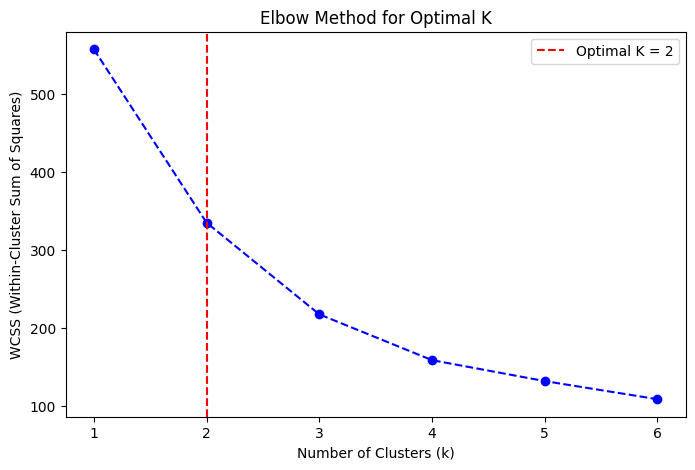

Optimal K found: 2
Tamil Sample Labels: [0 0 0 0 0 0 0 0 0 0]
Tamil Centroids Shape: (2, 2)


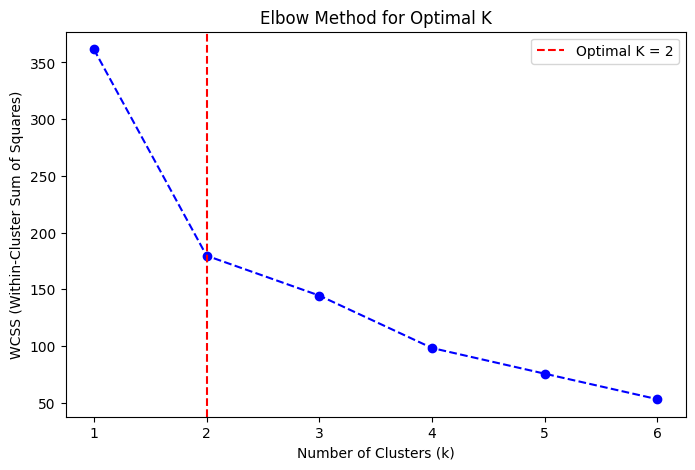

Optimal K found: 2
English Sample Labels: [1 0 0 1 1 1 0 1 1 1]
English Centroids Shape: (2, 2)


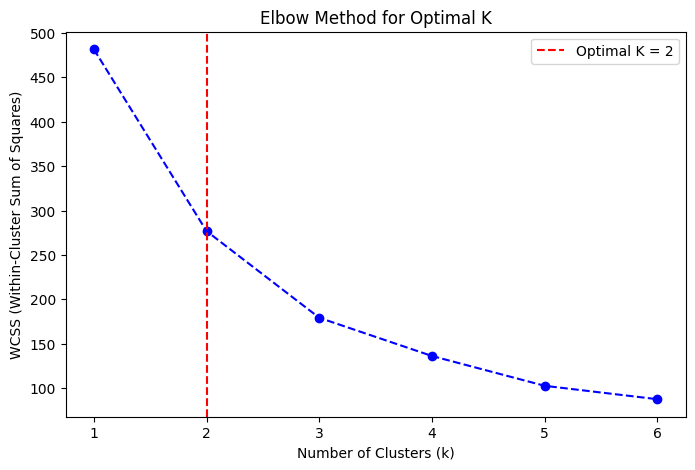

Optimal K found: 2
Hindi Sample Labels: [1 1 1 0 0 1 0 1 1 1]
Hindi Centroids Shape: (2, 2)


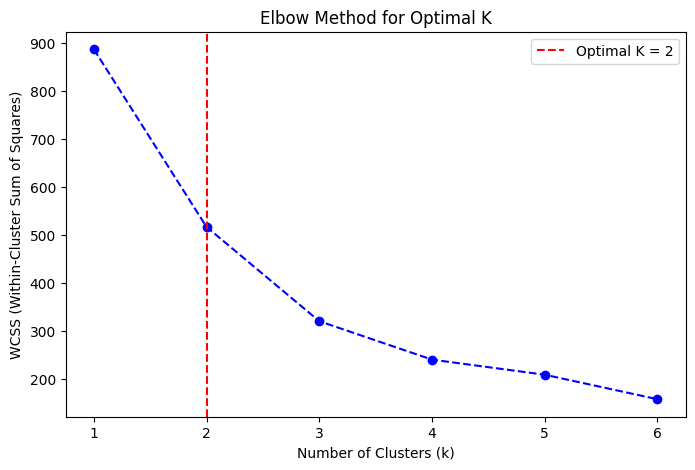

Optimal K found: 2
Unknown Sample Labels: [1 0 0 1 1 1 1 1 1 1]
Unknown Centroids Shape: (2, 2)


<ipython-input-26-52ff6b0e1c37>:15: RuntimeWarning: invalid value encountered in divide
  probabilities=distances/distances.sum()


ValueError: probabilities contain NaN

In [29]:
models = {}
labels = {}
centroids = {}

for lang in list_of_languages:
    lang=lang.lower()
    songs_scaled = globals()[lang + "_songs_scaled"]  # access variable like hindi_songs_scaled
    # Create the model (auto-selecting optimal k using elbow method)
    model = KMeansFromScratch(auto_k=True)
    #Visualising elbow plot
    model.plot_elbow(songs_scaled)
    model.fit(songs_scaled) #Fit the model to different scaled languages song data

    #Getting labels and centroids
    models[lang] = model
    labels[lang] = model.labels
    centroids[lang] = model.centroids

    #Printing 10 sample cluster assignments
    print(f"{lang.title()} Sample Labels:", model.labels[:10])
    print(f"{lang.title()} Centroids Shape:", model.centroids.shape)


In [30]:
# #Create the model (auto-selecting optimal k using elbow method)
# model = KMeansFromScratch(auto_k=True, max_k=10)

# #(Optional) Visualize elbow plot
# model.plot_elbow(songs_scaled)

# #Fit the model to the scaled Hindi song data
# model.fit(songs_scaled)

# #Getting labels and centroids
# hindi_labels = model.labels
# hindi_centroids = model.centroids

# # Print sample cluster assignments
# print("Sample Cluster Labels:", hindi_labels[:10])
# print("Centroids Shape:", hindi_centroids.shape)


**<h1>Song Recommender**

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
import re

In [33]:
from IPython.display import Image, display #to display artwork url

In [34]:
class SongRecommender:
    def __init__(self, data, song_names,model):
        self.data = data
        self.song_names = song_names
        self.model = model
        self.labels = model.labels

    def _normalise_name(self, name):
        name = name.lower().strip()
        name = re.sub(r'\(.*?\)', '', name).strip()
        return name

    def recommend(self, input_song_vector, input_song_name=None, n=7, language=None, indices_by_language=None,original_indices=None):
        input_cluster = np.argmin([
            np.linalg.norm(input_song_vector - c)
            for c in self.model.centroids
        ])
        print(f"🎯 Input song belongs to cluster: {input_cluster}")

        cluster_indices = np.where(self.labels == input_cluster)[0]
        cluster_songs = self.data[cluster_indices]

        similarities = cosine_similarity([input_song_vector], cluster_songs)[0]
        sorted_indices = np.argsort(similarities)[::-1]

        top_n_indices = []
        input_name_norm = self._normalise_name(input_song_name) if input_song_name else ""

        for i in sorted_indices:
            idx = cluster_indices[i]
            selected_song_name = self.song_names[idx]
            selected_song_name_norm = self._normalise_name(selected_song_name)

            if input_song_name and selected_song_name_norm == input_name_norm:
                continue

            top_n_indices.append(idx)
            if len(top_n_indices) == n:
                break

        print(f"\n🎵 Top {n} recommendations:")
        recommendations = []

        if original_indices is None:
         raise ValueError("Missing original indices for mapping back to full dataset.")

        for idx in top_n_indices:
            original_idx = original_indices[idx]  #Dynamic lookup
            name = self.song_names[idx]
            artist = original_data.loc[original_idx, 'artist_name']
            track_url = original_data.loc[original_idx, 'track_url']
            artwork_url = original_data.loc[original_idx, 'artwork_url']
            language = original_data.loc[original_idx, 'language']

            sim_score = cosine_similarity([input_song_vector], [self.data[idx]])[0][0]

            print(f"- {name} by {artist} (Similarity: {sim_score:.4f})")
            print(f"  🎧 Track URL: {track_url}")
            display(Image(url=artwork_url, width=100))
            print(f"  🌐 Language: {language}\n")

            recommendations.append({
                "name": name,
                "artist": artist,
                "similarity": sim_score,
                "track_url": track_url,
                "artwork_url": artwork_url
            })

        return recommendations


In [35]:
song_names = original_data["track_name"].tolist()

**<h4>Making it dynamic**

In [39]:
user_language = input("Enter your language preference(english, hindi, tamil,korean,unknown): ").strip().lower()
# Get indices of user_language songs in original_data
user_language_mask = original_data['language'].str.lower() == user_language
user_language_indices = original_data[user_language_mask].index.to_numpy()
# user_language_indices = original_data[original_data['language'].str.contains(user_language, case=False, na=False)].index


song_names_user_language = [song_names[i] for i in user_language_indices]  # Keep song names aligned

Enter your language preference(english, hindi, tamil,korean,unknown): hindi


In [40]:
# Match song in filtered language names

user_input = input("Enter a song name: ").strip().lower()
matching_indices = [i for i, name in enumerate(song_names_user_language) if name.strip().lower() == user_input] #matches indices in language

if not matching_indices:
    print("Song not found in specified dataset.")
else:
    songs_scaled = globals()[user_language + "_songs_scaled"]

    input_index = matching_indices[0]
    input_song_vector = songs_scaled[input_index]  # <- Using original scaled vector

    # Recommender should also use songs_scaled (not data_pca)
    recommender = SongRecommender(songs_scaled, song_names_user_language, models[user_language])
    recommender.recommend(input_song_vector, song_names_user_language[input_index], n=7,original_indices=user_language_indices)

Enter a song name: soch na sake
🎯 Input song belongs to cluster: 0

🎵 Top 7 recommendations:
- Junooni by Arijit Singh, Yashita Sharma (Similarity: 1.0000)
  🎧 Track URL: https://open.spotify.com/track/3ZvOTsMNv39Zq73i2HHL2H


  🌐 Language: Hindi

- Roke Na Ruke Naina (From "Badrinath Ki Dulhania") by Arijit Singh (Similarity: 1.0000)
  🎧 Track URL: https://open.spotify.com/track/6DBVELTPG2MCS1L3DlDXbi


  🌐 Language: Hindi

- Halla by Amit Trivedi, Shellee, Jyoti Nooran, Romy (Similarity: 1.0000)
  🎧 Track URL: https://open.spotify.com/track/1LrLUMPWyapk4g8IQbQHHv


  🌐 Language: Hindi

- Khali Khali by Mohit Chauhan (Similarity: 1.0000)
  🎧 Track URL: https://open.spotify.com/track/3eSfEXIZ3SNmqtwt8hQu0x


  🌐 Language: Hindi

- Priye Tamaro Prem No by Javed Ali (Similarity: 1.0000)
  🎧 Track URL: https://open.spotify.com/track/6ztr7HN4tZsKJ4dGsDMUcs


  🌐 Language: Hindi

- Ishaqzaade - Violin Version (Instrumental) by Amit Trivedi, Kausar Munir (Similarity: 1.0000)
  🎧 Track URL: https://open.spotify.com/track/5U0T0fd4sYM6pETLYCyAKr


  🌐 Language: Hindi

- Priye Tamaro Prem No by Javed Ali (Similarity: 1.0000)
  🎧 Track URL: https://open.spotify.com/track/7nnfJ4H2rdLF6GwklYZvHy


  🌐 Language: Hindi



Attempting to use a Spotify to fetch song features

In [41]:
# !pip install spotipy
# sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
#     client_id="14afb9597ff44b7eb738481d32b360a9",
#     client_secret="886a499f6c244dc58850572116a65b32"
# ))

# def get_audio_features_from_spotify(song_name):
#     results = sp.search(q=song_name, type='track', limit=1)
#     if not results['tracks']['items']:
#         return None
#     track = results['tracks']['items'][0]
#     features = sp.audio_features(track['id'])[0]
#     return features

# def preprocess_features(raw_features, scaler=None):
#     features_used = [
#         'acousticness', 'danceability', 'duration_ms', 'energy',
#         'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
#         'speechiness', 'tempo', 'time_signature', 'valence'
#     ]
#     feature_vector = [raw_features[feat] for feat in features_used]
#     return scaler.transform([feature_vector])[0] if scaler else feature_vector


In [42]:
# #Handle both known and unknown songs
# if not matching_indices:
#     print("🔍 Song not found in the dataset.")

#     # if user_language == "unknown":
#     #     print("📡 Fetching song features from Spotify...")
#     #     raw_features = get_audio_features_from_spotify(user_input)

#     #     if raw_features is not None:
#     #         input_song_vector = preprocess_features(raw_features, scaler=your_scaler)

#     #         recommender = SongRecommender(songs_scaled, song_names_user_language, model)
#     #         recommender.recommend(
#     #             input_song_vector,
#     #             input_song_name=user_input,
#     #             n=7,
#     #             original_indices=user_language_indices
#     #         )
#     #     else:
#     #         print("❌ Could not fetch song from Spotify.")
#     # else:
#     #     print("⚠️ Song not found in specified dataset.")
# else:
#     # Use dataset vector normally
#     input_index = matching_indices[0]
#     input_song_vector = songs_scaled[input_index]

#     recommender = SongRecommender(songs_scaled, song_names_user_language, model)
#     recommender.recommend(
#         input_song_vector,
#         song_names_user_language[input_index],
#         n=7,
#         original_indices=user_language_indices
#     )


2. **Optimum number of clusters improves the accuracy**

 It measures the euclidean distance between each data point and its cluster center and chooses the number of clusters based on where change in “within cluster sum of squares” (WCSS) levels off. This value represents the total variance within each cluster that gets plotted against the number of clusters. ***Best K is where the curve forms an elbow (sudden drop, then flattening).***



---



 **<h1> Cluster Evaluation Metrics </h1>**

1. All data points within a cluster should be similar.

2. Clusters should be distinct from each other.

The goal of the k-means clustering algorithm is to minimize the sum of squared errors (SSE)

**<h3>The Dunn index</h3>**

The second property is measured with the Dunn index. The Dunn index represents the relationship between the minimum intercluster distance and the maximum intracluster distance. Clusters with a high intercluster distance indicate better quality because it means that the clusters are as different from each other as possible.

Higher Dunn Index means better clustering such that clusters that are:Tight (low intra-cluster diameter) and Well-separated (high inter-cluster distance)

In [43]:
import numpy as np
from scipy.spatial.distance import cdist

def dunn_index(X, labels):
    """
     Dunn Index score (higher is better)
    """
    unique_labels = np.unique(labels)
    k = len(unique_labels)
    if k < 2:
        return 0  # Not defined for fewer than 2 clusters

    clusters = [X[labels == label] for label in unique_labels]

    # Calculating intercluster distances (min pairwise distance between clusters)
    min_intercluster_dist = np.inf
    for i in range(k):
        for j in range(i + 1, k):
            dist = cdist(clusters[i], clusters[j])
            min_dist = np.min(dist)
            min_intercluster_dist = min(min_intercluster_dist, min_dist)

    # Calculating intracluster diameters (max pairwise distance within each cluster)
    max_intracluster_diam = 0
    for cluster in clusters:
        if len(cluster) >= 2:
            diam = np.max(cdist(cluster, cluster))
            max_intracluster_diam = max(max_intracluster_diam, diam)

    if max_intracluster_diam == 0:
        return 0

    return min_intercluster_dist/max_intracluster_diam


In [44]:
def plot_dunn_index_vs_k(X, max_k=6):
    from sklearn.cluster import KMeans  # or use your custom KMeansFromScratch
    dunn_scores = []

    for k in range(2, max_k + 1):  # Dunn Index is not defined for k=1
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        labels = kmeans.labels_

        score = dunn_index(X, labels)
        dunn_scores.append(score)

        print(f"K={k} → Dunn Index: {score:.4f}")

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_k + 1), dunn_scores, marker='o', color='green')
    plt.title('Dunn Index vs Number of Clusters')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Dunn Index')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


K=2 → Dunn Index: 0.0049
K=3 → Dunn Index: 0.0040
K=4 → Dunn Index: 0.0060
K=5 → Dunn Index: 0.0034
K=6 → Dunn Index: 0.0041


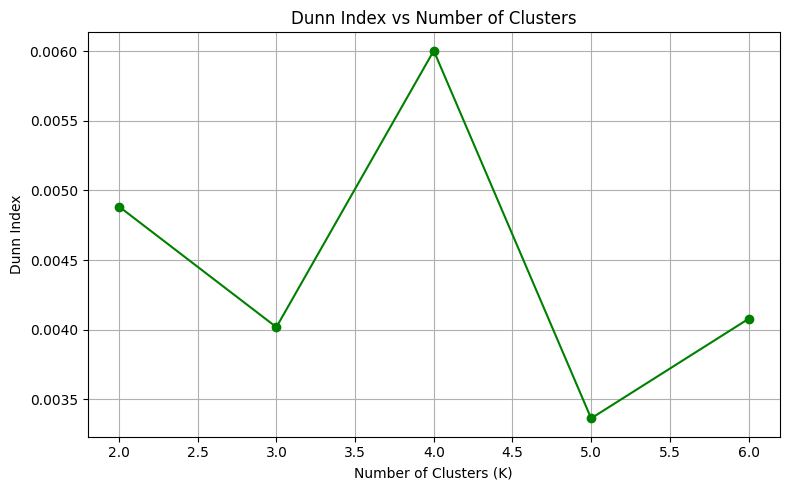

In [45]:
plot_dunn_index_vs_k(hindi_songs_scaled, max_k=6)

K=2 → Dunn Index: 0.0099
K=3 → Dunn Index: 0.0078
K=4 → Dunn Index: 0.0156
K=5 → Dunn Index: 0.0062
K=6 → Dunn Index: 0.0108


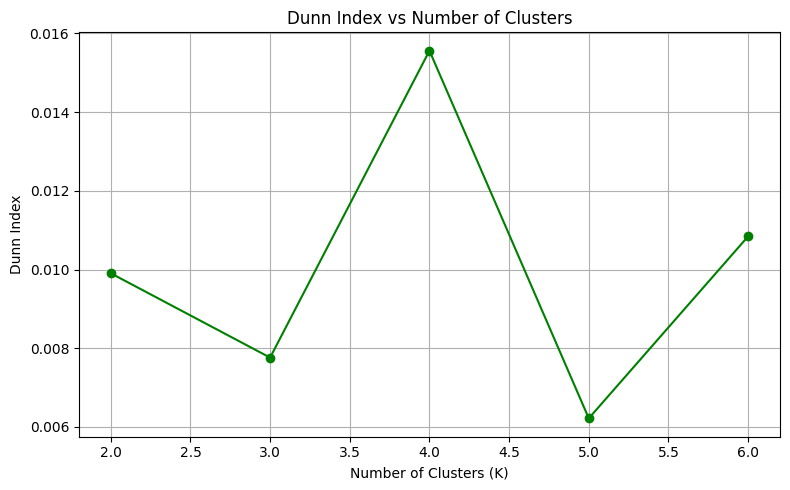

In [46]:
plot_dunn_index_vs_k(english_songs_scaled, max_k=6)

K=2 → Dunn Index: 0.0016
K=3 → Dunn Index: 0.0010
K=4 → Dunn Index: 0.0023
K=5 → Dunn Index: 0.0011
K=6 → Dunn Index: 0.0016


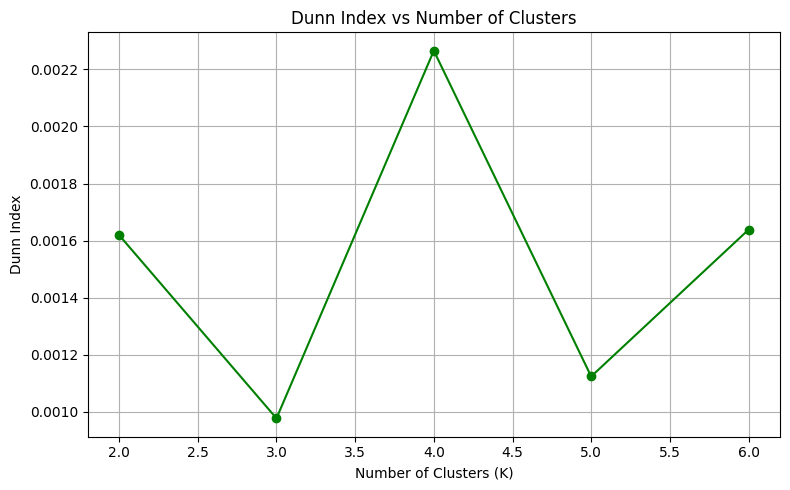

In [47]:
plot_dunn_index_vs_k(unknown_songs_scaled, max_k=6)

In [48]:
plot_dunn_index_vs_k(korean_songs_scaled, max_k=6)

K=2 → Dunn Index: 0.0000


ValueError: n_samples=2 should be >= n_clusters=3.

In [49]:
import joblib
for lang,model in models.items():
    joblib.dump(model, f"{lang}_kmeans_model.pkl")




---



<h3>Sources:


1.   https://www.ibm.com/think/topics/k-means-clustering
2.   List item
3.

